In [1]:
################################################
# Numerical Methods for Stachastic             #
# Differential Equations                       #
# Student: Nikos Nikolopoulos                  #
################################################
#-----------------------------------------------
#-----------------------------------------------
################################################
# Conclusive observations                      #
################################################
#-----------------------------------------------

#import libraries
import time
import numpy as np
import math
from matplotlib import pyplot as plt
from math import exp
from numpy.lib.scimath  import sqrt
from scipy.integrate import quad
#-----------------------------------------------
import warnings
warnings.filterwarnings("ignore")
#-----------------------------------------------

# to plot the results in the notebook:
%matplotlib inline

In [2]:
#-----------------------------------------------
################################################
# Euler Monte Carlo method for a call option   #
# under the Heston stochastic volatility model.#
################################################
#-----------------------------------------------

price_trajectories = []             #MC array

def EMC_Call_Option(S,V,r,T,delta_t,N,K,k,theta,eta,rho):
    M = N**2                            #simulations
    payoff_array       = []
    discount_factor    = exp(-r * T)

    # Tic
    t = time.time()

    # Calculating payoff vector.
    for i in range(0, M):

        S_old = S
        V_old = V
        
        for i in range(0, N):
            xi = np.random.normal(0,sqrt(delta_t)) 
            xj = np.random.normal(0,sqrt(delta_t))
            
            xk = rho*xi + sqrt(1-rho**2)*xj

            S_new = S_old + r*S_old*delta_t + S_old*sqrt(max(V_old,0))*xi
                
            V_new = V_old + k*(theta-V_old)*delta_t + eta*sqrt(max(V_old,0))*xk

            S_old = S_new
            V_old = V_new
            

        price_trajectories.append(S_new)
        payoff=max(S_new-K,0)
        payoff_array.append(payoff)

    # Computing price
    payoff_array = np.array(payoff_array, dtype=float) 
    price = np.sum(discount_factor*payoff_array)/M
    print("Call Option Price      : %.4f" % price)

    # Statistics
    variance = np.var(discount_factor*payoff_array)
    sd = np.std(discount_factor*payoff_array)
    # Variance Estimator
    varest=sum((price-discount_factor*payoff_array)**2)/(M-1)
    # Root Mean Square Error
    RMSE=sqrt(varest)/sqrt(M)
    # 95% C.I. uses 1.96 z-value
    CI = [price - (1.96*sd/sqrt(float(M))),
          price + (1.96*sd/sqrt(float(M)))]

    # Toc
    elapsed = time.time() - t

    #Print
    print("Variance               : %.4f" % variance)
    print("Standard Deviation     : %.4f" % sd)
    print("95% Confidence Interval:", CI) 
    print("Variance Estimator     : %.4f" % varest)
    print("Root Mean Square Error : %.4f" % RMSE)
    print("Run time               : %.4f" % elapsed)

    # Plot
    sims=range(1,M+1)
    plt.plot(sims,price_trajectories,color = 'red')
    plt.suptitle('Maturity Prices', fontsize=35)
    plt.xlabel('Simulation #', fontsize = 30)
    plt.ylabel('Price', fontsize= 30)
    plt.grid(True)
     
    return price

In [3]:
################################################
# Input data.                                  #
################################################
S         = 100                             #spot price
V         = 0.09                            #initial volatility
X         = np.log(S)                       #ln(S_0)
r         = 0                               #interest rate
T         = 1                               #maturity
k         = 1
theta     = 0.09
eta       = 1
rho       = -0.3                            #correlation
N         = 100                             #number of discrete time points
delta_t   = T / N                           #length of interval partition 

Call Option Price      : 23.8646
Variance               : 511.5894
Standard Deviation     : 22.6183
95% Confidence Interval: [23.421246003142194, 24.3078850142471]
Variance Estimator     : 511.6406
Root Mean Square Error : 0.2262
Run time               : 88.6685


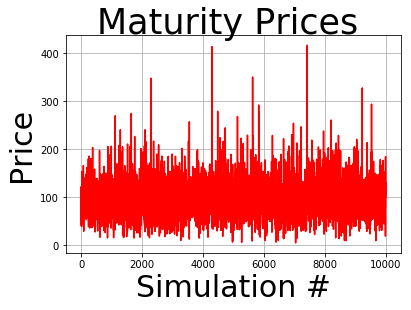

In [4]:
K         = 80                              #strike price(i)

C_80      = EMC_Call_Option(S,V,r,T,delta_t,N,K,k,theta,eta,rho)

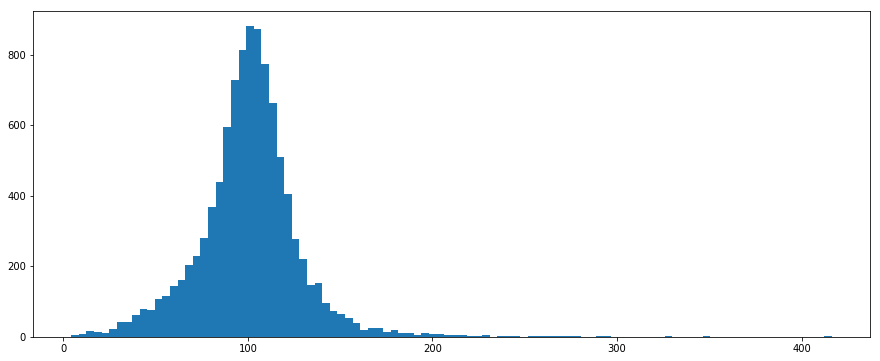

In [10]:
plt.figure(figsize=(15,6))
plt.hist(price_trajectories, bins=100)
plt.show()